# StarCraft 2 Player Analysis 

![SC2 Banner](https://www.thesportsgeek.com/wp-content/uploads/2020/03/starcraft-2-banner.jpg)

This is a simple analysis of SC2 players over time, that takes a look into various statistics for each player. Our data set was provided by Aligulac, a website that gathers and analizes SC2 data points for predictions. Throughout this analysis we will be utlizing various skills and tools including; PostgreSQL, pandas, numpy, matplotlib, and more!

This project is a Final Course Project for [Data Analysis with Python: Zero to Pandas](zerotopandas.com)

### How to run the code

This is an executable [*Jupyter notebook*](https://jupyter.org) hosted on [Jovian.ml](https://www.jovian.ml), a platform for sharing data science projects. You can run and experiment with the code in a couple of ways: *using free online resources* (recommended) or *on your own computer*.

#### Option 1: Running using free online resources (1-click, recommended)

The easiest way to start executing this notebook is to click the "Run" button at the top of this page, and select "Run on Binder". This will run the notebook on [mybinder.org](https://mybinder.org), a free online service for running Jupyter notebooks. You can also select "Run on Colab" or "Run on Kaggle".


#### Option 2: Running on your computer locally

1. Install Conda by [following these instructions](https://conda.io/projects/conda/en/latest/user-guide/install/index.html). Add Conda binaries to your system `PATH`, so you can use the `conda` command on your terminal.

2. Create a Conda environment and install the required libraries by running these commands on the terminal:

```
conda create -n zerotopandas -y python=3.8 
conda activate zerotopandas
pip install jovian jupyter numpy pandas matplotlib seaborn opendatasets --upgrade
```

3. Press the "Clone" button above to copy the command for downloading the notebook, and run it on the terminal. This will create a new directory and download the notebook. The command will look something like this:

```
jovian clone notebook-owner/notebook-id
```



4. Enter the newly created directory using `cd directory-name` and start the Jupyter notebook.

```
jupyter notebook
```

You can now access Jupyter's web interface by clicking the link that shows up on the terminal or by visiting http://localhost:8888 on your browser. Click on the notebook file (it has a `.ipynb` extension) to open it.


In [1]:
data_dir = './sc2_data_set'

In [2]:
import os
os.listdir(data_dir)

['player.csv',
 'rating.csv',
 'period.csv',
 'match.csv',
 'earnings.csv',
 'eventadjacency.csv',
 'event.csv']

Let us save and upload our work to Jovian before continuing.

In [3]:
project_name, file_name = "zerotopandas-course-project-sc2-analysis", "course-project-sc2-analysis.ipynb"

In [4]:
%pip install jovian --upgrade -q

Note: you may need to restart the kernel to use updated packages.


In [5]:
import jovian

<IPython.core.display.Javascript object>

In [6]:
# jovian.commit(project=project_name, filename=file_name)

## Data Preparation and Cleaning



### Player Dataframe

First, lets build out our data frame that will contain all the relevent infromation that we would like to store about our players. This will include things like; the players game tag, their real name, birthdate, rating, ranking, etc.

In [7]:
import pandas as pd

In [8]:
players_raw_df = pd.read_csv('./sc2_data_set/player.csv')

In [9]:
ratings_raw_df = pd.read_csv('./sc2_data_set/rating.csv')

In [10]:
players_raw_df

,id,tag,name,birthday,mcnum,tlpd_id,tlpd_db,lp_name,sc2e_id,country,race,dom_val,dom_start_id,dom_end_id,current_rating_id,romanized_name
0,3783,LambNRice,NaN,NaN,3.0,4198.0,2.0,NaN,NaN,US,Z,-2.025225,248.0,249.0,8158480.0,NaN
1,17464,Saxy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AU,P,-2.258618,69.0,70.0,8147583.0,NaN
2,20617,selected,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RU,T,-1.966158,26.0,27.0,8154846.0,NaN
3,6090,Lampan,Stefan Landberg,NaN,3.0,NaN,NaN,NaN,NaN,SE,Z,-1.109030,39.0,40.0,8157144.0,NaN
4,10798,Larke,Wynand Dierckx,NaN,3.0,NaN,0.0,NaN,NaN,BE,Z,-1.490544,48.0,49.0,8155110.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21290,1333,Zingy,NaN,NaN,NaN,NaN,0.0,NaN,NaN,US,Z,-0.694822,28.0,29.0,8159338.0,NaN
21291,11581,zinkisu,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JP,P,-2.532888,178.0,179.0,8144811.0,NaN
21292,19224,梁家齐,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CN,R,-1.805503,26.0,27.0,8160926.0,NaN
21293,19654,楊桃嘉,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TW,R,-1.865379,26.0,27.0,8160480.0,NaN


In [11]:
ratings_raw_df

,id,period_id,player_id,rating,rating_vp,rating_vt,rating_vz,dev,dev_vp,dev_vt,...,bf_dev_vp,bf_dev_vt,bf_dev_vz,position,position_vp,position_vt,position_vz,decay,domination,prev_id
0,8155887,315,8103,-0.049607,0.000000,0.000000,0.000000,0.160000,0.160000,0.160000,...,0.160000,0.160000,0.160000,NaN,NaN,NaN,NaN,202,NaN,8139942.0
1,8155888,315,19857,-0.024102,0.000000,0.000000,0.000000,0.160000,0.160000,0.160000,...,0.160000,0.160000,0.160000,NaN,NaN,NaN,NaN,57,NaN,8138827.0
2,8155889,315,19018,-0.004294,0.020316,0.000000,-0.020316,0.160000,0.160000,0.160000,...,0.160000,0.160000,0.160000,NaN,NaN,NaN,NaN,73,NaN,8134230.0
3,8155890,315,12436,-0.472375,0.000000,0.055320,-0.055320,0.160000,0.160000,0.160000,...,0.160000,0.160000,0.160000,NaN,NaN,NaN,NaN,156,NaN,8134229.0
4,8119605,313,7352,0.127804,0.000000,0.000000,0.000000,0.160000,0.160000,0.160000,...,0.102806,0.102806,0.102806,NaN,NaN,NaN,NaN,242,NaN,8083596.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470261,3217410,8,531,-0.021625,-0.003403,0.032593,-0.029190,0.160000,0.160000,0.160000,...,0.092194,0.092193,0.092194,NaN,NaN,NaN,NaN,4,NaN,3217241.0
3470262,4994780,8,6873,-0.026244,0.000000,0.000000,0.000000,0.160000,0.160000,0.160000,...,0.092195,0.092195,0.092195,184.0,187.0,186.0,181.0,3,NaN,4994751.0
3470263,3217441,8,621,-0.032045,-0.009143,-0.008298,0.017441,0.152955,0.153894,0.153849,...,0.090467,0.090678,0.090556,207.0,231.0,218.0,150.0,2,NaN,3217272.0
3470264,5775111,8,53,0.028724,-0.001028,0.001028,0.000000,0.160000,0.160000,0.160000,...,0.092195,0.092195,0.092195,NaN,NaN,NaN,NaN,5,NaN,5775110.0


Above are our raw rating and player dataframes pulled from Aligulac, for our analysis, these will be better off in the same dataframe, so lets merge them. 

In [12]:
ratings_raw_df = ratings_raw_df.rename(columns={'id': 'current_rating_id'})

In [13]:
players_raw_df_v2 = players_raw_df.merge(ratings_raw_df, on='current_rating_id')

Let merge our earnings dataframe from Aligulac into our player_df as well.

In [14]:
earnings_raw_df = pd.read_csv('./sc2_data_set/earnings.csv')

In [15]:
earnings_raw_df

,id,event_id,player_id,earnings,origearnings,currency,placement
0,1,11922,28,12500.0,12500.0,USD,1
1,2,11922,18,6250.0,6250.0,USD,2
2,3,11922,22,3750.0,3750.0,USD,3
3,4,11922,106,2500.0,2500.0,USD,4
4,5,11921,3,12500.0,12500.0,USD,1
...,...,...,...,...,...,...,...
46549,70248,128139,47,100.0,100.0,USD,3
46550,70253,128139,4134,50.0,50.0,USD,8
46551,70252,128139,19591,50.0,50.0,USD,7
46552,70251,128139,14887,50.0,50.0,USD,6


In [16]:
players_raw_df_v3 = players_raw_df_v2.merge(earnings_raw_df, on='player_id')

In [17]:
players_raw_df_v3

,id_x,tag,name,birthday,mcnum,tlpd_id,tlpd_db,lp_name,sc2e_id,country,...,position_vz,decay,domination,prev_id,id_y,event_id,earnings,origearnings,currency,placement
0,3783,LambNRice,NaN,NaN,3.0,4198.0,2.0,NaN,NaN,US,...,NaN,46,NaN,8130240.0,45808,104016,150.0,150.0,USD,15
1,17464,Saxy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AU,...,NaN,42,NaN,8135121.0,39439,94551,50.0,70.0,AUD,6
2,17464,Saxy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AU,...,NaN,42,NaN,8135121.0,42672,97030,25.0,25.0,USD,3
3,428,Matiz,Mateusz Kowalski,NaN,3.0,2997.0,2.0,NaN,NaN,PL,...,NaN,74,NaN,8143034.0,24564,57904,13.0,50.0,PLN,8
4,428,Matiz,Mateusz Kowalski,NaN,3.0,2997.0,2.0,NaN,NaN,PL,...,NaN,74,NaN,8143034.0,25066,60137,15.0,15.0,USD,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46546,8169,Vindicta,Miguel Marmolejo,NaN,2.0,NaN,0.0,NaN,NaN,US,...,75.0,0,-1.036291,8135495.0,68479,126072,60.0,60.0,USD,1
46547,8169,Vindicta,Miguel Marmolejo,NaN,2.0,NaN,0.0,NaN,NaN,US,...,75.0,0,-1.036291,8135495.0,68441,125435,400.0,400.0,USD,0
46548,8169,Vindicta,Miguel Marmolejo,NaN,2.0,NaN,0.0,NaN,NaN,US,...,75.0,0,-1.036291,8135495.0,69072,126570,30.0,30.0,USD,2
46549,8169,Vindicta,Miguel Marmolejo,NaN,2.0,NaN,0.0,NaN,NaN,US,...,75.0,0,-1.036291,8135495.0,69541,126752,50.0,50.0,USD,4


In [18]:
for column in players_raw_df_v3.columns:
    print(column)

id_x
tag
name
birthday
mcnum
tlpd_id
tlpd_db
lp_name
sc2e_id
country
race
dom_val
dom_start_id
dom_end_id
current_rating_id
romanized_name
period_id
player_id
rating
rating_vp
rating_vt
rating_vz
dev
dev_vp
dev_vt
dev_vz
comp_rat
comp_rat_vp
comp_rat_vt
comp_rat_vz
bf_rating
bf_rating_vp
bf_rating_vt
bf_rating_vz
bf_dev
bf_dev_vp
bf_dev_vt
bf_dev_vz
position
position_vp
position_vt
position_vz
decay
domination
prev_id
id_y
event_id
earnings
origearnings
currency
placement


In [19]:
drop_list = ['mcnum',
'tlpd_id',
'tlpd_db',
'lp_name',
'sc2e_id',
'dom_start_id',
'dom_end_id',
'current_rating_id',
'romanized_name',
'dev',
'dev_vp',
'dev_vt',
'dev_vz',
'bf_dev',
'bf_dev_vp',
'bf_dev_vt',
'bf_dev_vz',
'decay',
'domination',
'prev_id',
'id_y',
'dom_val']

In [20]:
players_raw_df_v3.drop(columns=drop_list, inplace=True)

In [21]:
players_raw_df_v3

,id_x,tag,name,birthday,country,race,period_id,player_id,rating,rating_vp,...,bf_rating_vz,position,position_vp,position_vt,position_vz,event_id,earnings,origearnings,currency,placement
0,3783,LambNRice,NaN,NaN,US,Z,315,3783,-0.078985,0.036516,...,-0.065541,NaN,NaN,NaN,NaN,104016,150.0,150.0,USD,15
1,17464,Saxy,NaN,NaN,AU,P,315,17464,-0.294305,0.006320,...,-0.061207,NaN,NaN,NaN,NaN,94551,50.0,70.0,AUD,6
2,17464,Saxy,NaN,NaN,AU,P,315,17464,-0.294305,0.006320,...,-0.061207,NaN,NaN,NaN,NaN,97030,25.0,25.0,USD,3
3,428,Matiz,Mateusz Kowalski,NaN,PL,Z,315,428,0.326089,-0.095600,...,0.040341,NaN,NaN,NaN,NaN,57904,13.0,50.0,PLN,8
4,428,Matiz,Mateusz Kowalski,NaN,PL,Z,315,428,0.326089,-0.095600,...,0.040341,NaN,NaN,NaN,NaN,60137,15.0,15.0,USD,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46546,8169,Vindicta,Miguel Marmolejo,NaN,US,T,315,8169,1.012123,-0.091960,...,0.147357,83.0,92.0,90.0,75.0,126072,60.0,60.0,USD,1
46547,8169,Vindicta,Miguel Marmolejo,NaN,US,T,315,8169,1.012123,-0.091960,...,0.147357,83.0,92.0,90.0,75.0,125435,400.0,400.0,USD,0
46548,8169,Vindicta,Miguel Marmolejo,NaN,US,T,315,8169,1.012123,-0.091960,...,0.147357,83.0,92.0,90.0,75.0,126570,30.0,30.0,USD,2
46549,8169,Vindicta,Miguel Marmolejo,NaN,US,T,315,8169,1.012123,-0.091960,...,0.147357,83.0,92.0,90.0,75.0,126752,50.0,50.0,USD,4


In [22]:
players_full_df = players_raw_df_v3

In [23]:
import jovian

In [24]:
# jovian.commit(project= project_name, filename= file_name)

## Exploratory Analysis and Visualization

Let's begin by importing`matplotlib.pyplot` and `seaborn` as well as `pycountry` and `geopandas`.

In [25]:
import numpy as np

%pip install pycountry
import pycountry

%conda install -c conda-forge geopandas
import geopandas

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Note: you may need to restart the kernel to use updated packages.
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### Player Total Earnings

Lets take a look at how much our players earn and how that relates to their ranking overall. 

We will use our player dataframe to take a look at each players earnings from all events.
- Groupby player tag; with sum of earnings
- Sort values in decending order

In [26]:
total_earnings = players_full_df.groupby('tag')['earnings'].sum()

In [27]:
highest_earnings = total_earnings.sort_values(ascending=False).head(10)

In [28]:
highest_earnings

tag
Serral        1127915.0
Rogue          995589.0
Maru           957584.0
Dark           859944.0
INnoVation     739144.0
TY             676714.0
Zest           644705.0
sOs            621897.0
Stats          595988.0
soO            580614.0
Name: earnings, dtype: float64

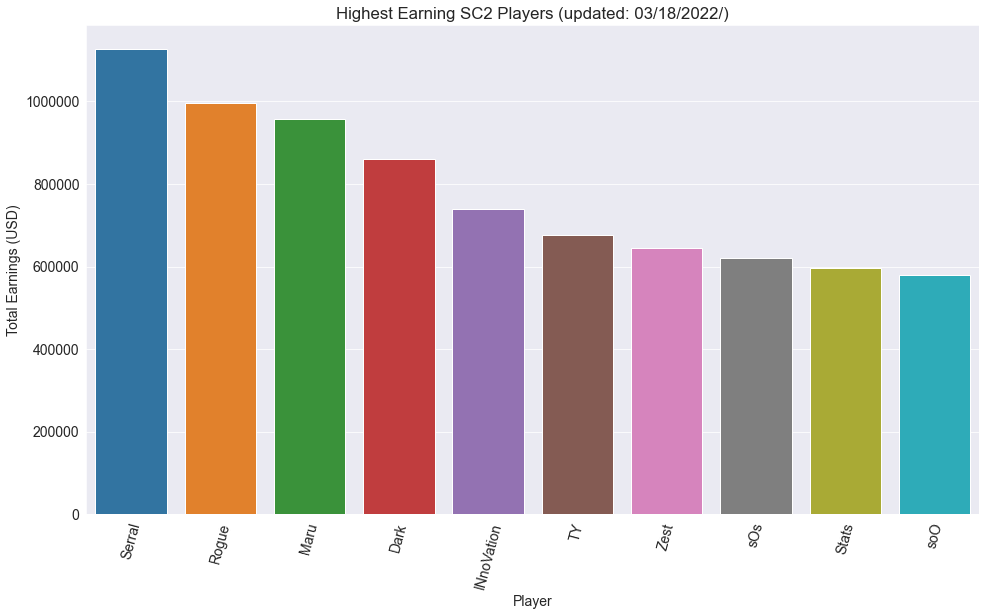

In [29]:
plt.figure(figsize=(16,9))
plt.xticks(rotation=75)
plt.title('Highest Earning SC2 Players (updated: 03/18/2022/)')
ax = sns.barplot(x=highest_earnings.index, y=highest_earnings.values)
ax.ticklabel_format(useOffset=False, style='plain', axis='y')
ax.set(ylabel='Total Earnings (USD)', xlabel='Player');

### Player Race Distribution

Lets take a look at how the distribution of races looks amoung the players.

Again, lets use our players dataframe to take a look at each players race.
- Group players by their tag; with their most common race
- Create a series of value counts for races to get total count

In [30]:
player_races = players_full_df.groupby('tag')['race'].max()

In [31]:
racepop = player_races.value_counts()

In [32]:
racepop

P    936
Z    925
T    821
R     17
S      3
Name: race, dtype: int64

In [33]:
# lets drop the randoms and the switchers as they fucntion as outliers

racepop.drop(index='R', inplace=True)
racepop.drop(index='S', inplace=True)

In [34]:
racepop.rename(index={'P': 'Protoss', 'Z': 'Zerg', 'T': 'Terran'}, inplace=True)

In [35]:
racepop

Protoss    936
Zerg       925
Terran     821
Name: race, dtype: int64

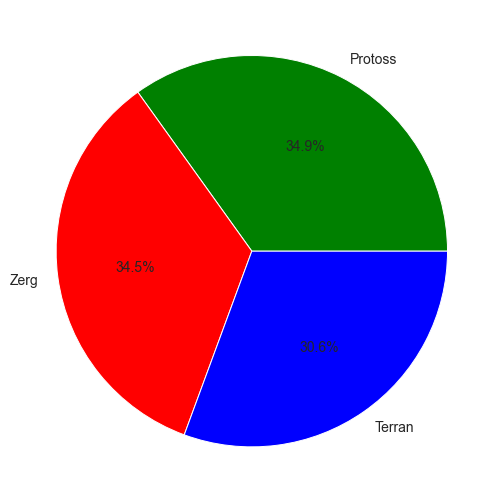

In [36]:
clrs = ['Green', 'Red', 'Blue']
plt.figure(figsize=(16,9))
plt.pie(racepop, autopct='%1.1f%%', labels=racepop.index, colors=clrs);

### Player Country Distribution

Lets take a look at where each player is from so that we can get a good picture of whose playing StarCraft.

Again, we will use our player dataframe to look at country or origin.
- groupby every player; with country of birth
- join every country of birth with a country code
- join every country of birth with an approx lon and lat
- join dataframe with geopandas dataframe for country geometry

In [37]:
players_country = players_full_df.groupby('tag')['country'].max().to_frame()
players_country.reset_index(inplace=True)
players_country.rename(columns={'country': 'code'}, inplace=True)

In [38]:
players_country

,tag,code
0,ABomB,IE
1,ACID,DE
2,ADRIEN,FR
3,AGIANTSMURF,US
4,AK,TW
...,...,...
2697,风间琉璃,CN
2698,香辣蟹,CN
2699,高冷小傲娇,CN
2700,박희성,KR


In [39]:
locations_df = pd.read_csv('./locations.csv')
locations_df.rename(columns={'ISO 3166 Country Code': 'code'}, inplace=True)

players_country_df = players_country.merge(locations_df, on='code')

In [40]:
player_location_count = players_country_df.groupby('Country')['tag'].count().to_frame().reset_index()
player_location_count.rename(columns={'tag': 'count'}, inplace=True)

In [41]:
player_location_count

,Country,count
0,Algeria,1
1,Argentina,17
2,Australia,89
3,Austria,9
4,Bangladesh,1
...,...,...
76,United Arab Emirates,1
77,United States,383
78,Uruguay,1
79,Venezuela,2


In [42]:
player_loc_dist = player_location_count

In [43]:
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code = pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
player_loc_dist['code']=alpha3code(player_loc_dist.Country)

In [44]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world.columns = ['pop_est', 'contient', 'name', 'code', 'gdp_md_est', 'geometry']

In [45]:
player_loc_dist = pd.merge(world, player_loc_dist, on='code')
player_loc_dist

,pop_est,contient,name,code,gdp_md_est,geometry,Country,count
0,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,143
1,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,383
2,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,8
3,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",Indonesia,9
4,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina,17
...,...,...,...,...,...,...,...,...
67,28571770,Asia,Saudi Arabia,SAU,1731000.0,"POLYGON ((34.95604 29.35655, 36.06894 29.19749...",Saudi Arabia,1
68,33986655,Africa,Morocco,MAR,282800.0,"POLYGON ((-2.16991 35.16840, -1.79299 34.52792...",Morocco,1
69,97041072,Africa,Egypt,EGY,1105000.0,"POLYGON ((36.86623 22.00000, 32.90000 22.00000...",Egypt,1
70,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,3


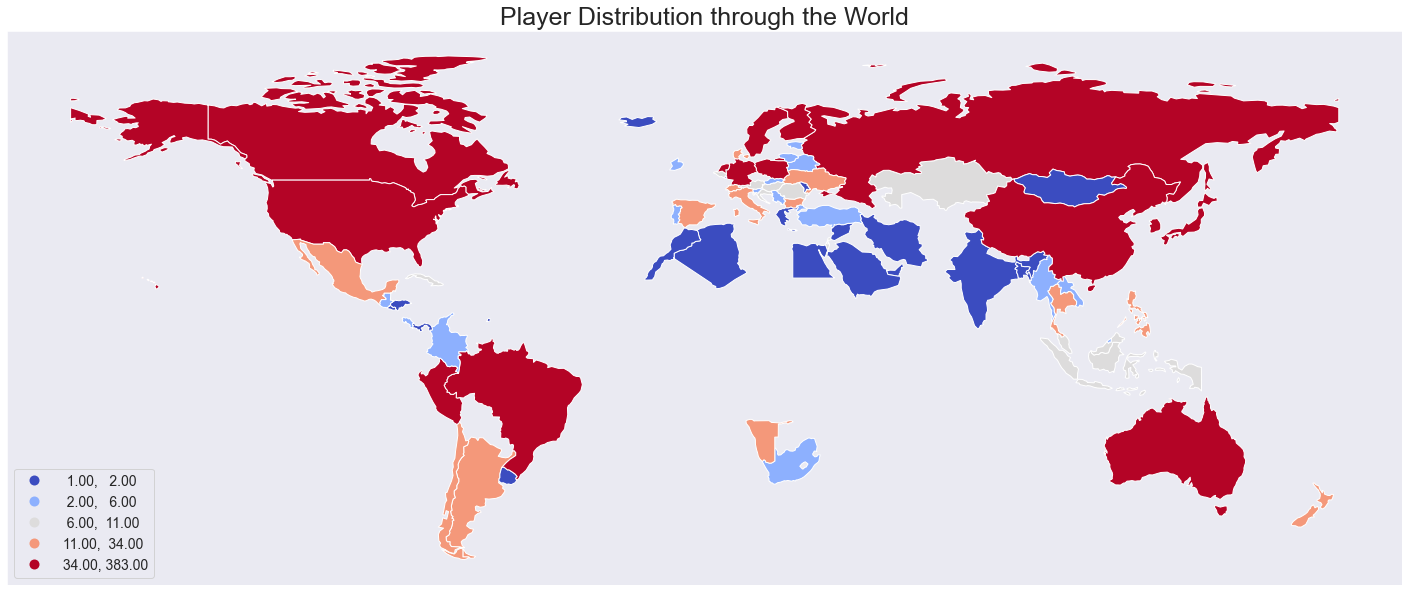

In [46]:
ax = player_loc_dist.plot(column='count', scheme="quantiles",
           figsize=(25, 20),
           legend=True,
           legend_kwds={'loc': 'lower left'}, 
           cmap='coolwarm')

plt.title('Player Distribution through the World',fontsize=25)
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.show();

In [47]:
players_full_df.groupby('position')['tag'].max()
players_full_df.groupby('position')['tag'].max().head(10)
top_countries = players_full_df.groupby('position')['country'].max().head(10)

How does total distriution compare with distribition among the top 10?

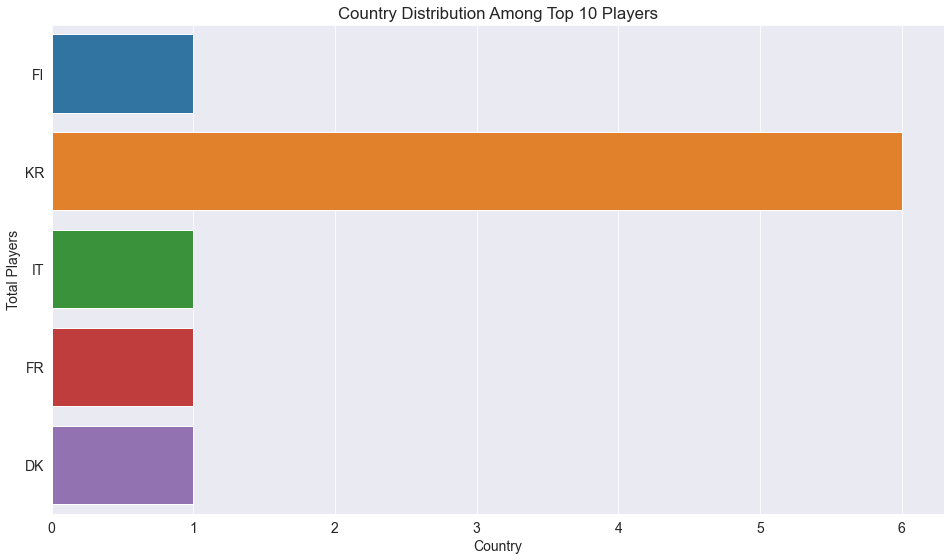

In [48]:
plt.figure(figsize=(16,9))
plt.title('Country Distribution Among Top 10 Players')
ax = sns.countplot(y=top_countries)
ax.set(ylabel='Total Players', xlabel='Country');

In [49]:
top_countries50 = players_full_df.groupby('position')['country'].max().head(50)

What about the top 50?

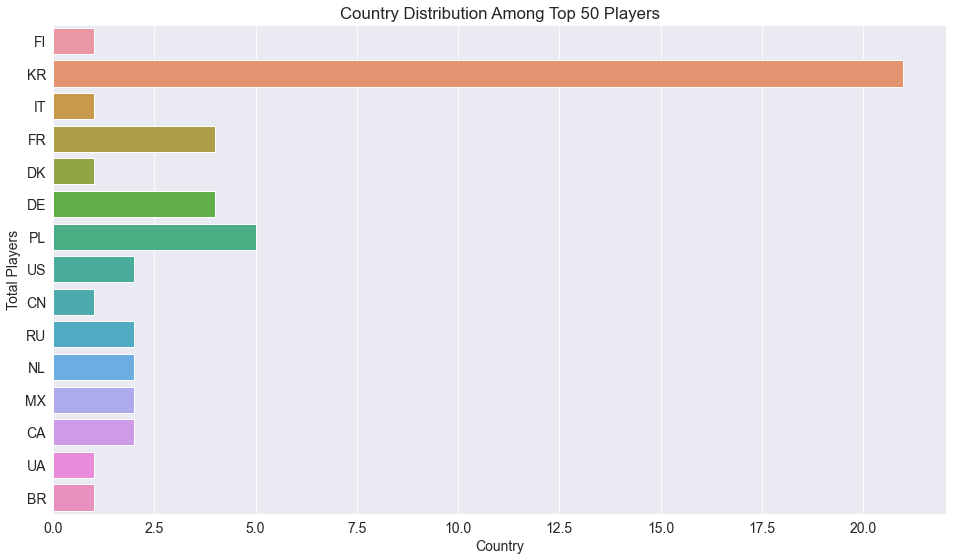

In [50]:
plt.figure(figsize=(16,9))
plt.title('Country Distribution Among Top 50 Players')
ax = sns.countplot(y=top_countries50)
ax.set(ylabel='Total Players', xlabel='Country');

Let us save and upload our work to Jovian before continuing

In [51]:
import jovian

In [52]:
# jovian.commit(project=project_name, filename=file_name)

## Asking and Answering Questions

### Q1: What dose the 'journey' to the top 5 look like?

Lets take a look at the stats for the top 5 while they were working our way to the top. A few things to keep in mind:
- this will require us to look at the results for every match that every player as ever played, thats a lot of data
- we will want to know each players rating at each event, so that we can track this over time
- each event in the match dataframe contains both players, we will need to split each player so they get their own entry
- we need to be sure each event is match with a date

To do this, we will need to create a new dataframe; the 'match_df'. 

In [53]:
# top five players over time

First, lets pull the match dataframe from Aligulac. It contains a few columns that we will not need, so lets clean it up a little bit.

In [54]:
match_raw_df = pd.read_csv('./sc2_data_set/match.csv')

In [55]:
# split away player a from the aligulac dataframe

match_raw_pla = match_raw_df.drop(columns=['plb_id', 'scb', 'rcb', 'submitter_id', 'rtb_id'])

In [56]:
match_raw_v2 = match_raw_pla.rename(columns={'pla_id': 'player_id', 'sca': 'score', 'rca': 'race', 'rta_id': 'rating'})
match_raw_v2

,id,period_id,date,player_id,score,race,treated,event,eventobj_id,game,offline,rating
0,204283,168,2016-07-24,422,3,Z,t,NaN,59979.0,LotV,t,5666026.0
1,204881,168,2016-07-31,962,1,Z,t,NaN,60184.0,LotV,f,5666535.0
2,204373,168,2016-07-25,61,0,Z,t,NaN,60005.0,LotV,f,5665673.0
3,24883,2,2010-03-13,208,4,Z,t,NaN,7311.0,WoL,f,NaN
4,205013,168,2016-08-01,1100,2,T,t,NaN,60235.0,LotV,f,5666661.0
...,...,...,...,...,...,...,...,...,...,...,...,...
398600,346716,268,2020-05-29,68,2,P,t,NaN,109833.0,LotV,f,7180448.0
398601,346717,268,2020-05-29,4134,1,P,t,NaN,109833.0,LotV,f,7177379.0
398602,346718,268,2020-05-29,229,2,T,t,NaN,109833.0,LotV,f,7169496.0
398603,346720,268,2020-05-29,422,2,Z,t,NaN,109833.0,LotV,f,7169511.0


In [57]:
# split away player b

match_raw_plb = match_raw_df.drop(columns=['pla_id', 'sca', 'rca', 'submitter_id', 'rta_id'])

In [58]:
match_raw_v3 = match_raw_plb.rename(columns={'plb_id': 'player_id', 'scb': 'score', 'rcb': 'race', 'rtb_id': 'rating'})
match_raw_v3

,id,period_id,date,player_id,score,race,treated,event,eventobj_id,game,offline,rating
0,204283,168,2016-07-24,2102,1,P,t,NaN,59979.0,LotV,t,5667543.0
1,204881,168,2016-07-31,12662,0,Z,t,NaN,60184.0,LotV,f,5676810.0
2,204373,168,2016-07-25,4551,2,Z,t,NaN,60005.0,LotV,f,5669668.0
3,24883,2,2010-03-13,1218,2,P,t,NaN,7311.0,WoL,f,1370384.0
4,205013,168,2016-08-01,10298,1,Z,t,NaN,60235.0,LotV,f,5674632.0
...,...,...,...,...,...,...,...,...,...,...,...,...
398600,346716,268,2020-05-29,20275,1,T,t,NaN,109833.0,LotV,f,7180509.0
398601,346717,268,2020-05-29,1652,2,P,t,NaN,109833.0,LotV,f,7177365.0
398602,346718,268,2020-05-29,13223,1,P,t,NaN,109833.0,LotV,f,7180666.0
398603,346720,268,2020-05-29,13890,0,T,t,NaN,109833.0,LotV,f,7177439.0


In [59]:
# concatanate both dataframes

match_raw_v4 = pd.concat([match_raw_v2, match_raw_v3])
match_raw_v4 = match_raw_v4.rename(columns={'rating': 'current_rating_id'})
match_raw_v4

,id,period_id,date,player_id,score,race,treated,event,eventobj_id,game,offline,current_rating_id
0,204283,168,2016-07-24,422,3,Z,t,NaN,59979.0,LotV,t,5666026.0
1,204881,168,2016-07-31,962,1,Z,t,NaN,60184.0,LotV,f,5666535.0
2,204373,168,2016-07-25,61,0,Z,t,NaN,60005.0,LotV,f,5665673.0
3,24883,2,2010-03-13,208,4,Z,t,NaN,7311.0,WoL,f,NaN
4,205013,168,2016-08-01,1100,2,T,t,NaN,60235.0,LotV,f,5666661.0
...,...,...,...,...,...,...,...,...,...,...,...,...
398600,346716,268,2020-05-29,20275,1,T,t,NaN,109833.0,LotV,f,7180509.0
398601,346717,268,2020-05-29,1652,2,P,t,NaN,109833.0,LotV,f,7177365.0
398602,346718,268,2020-05-29,13223,1,P,t,NaN,109833.0,LotV,f,7180666.0
398603,346720,268,2020-05-29,13890,0,T,t,NaN,109833.0,LotV,f,7177439.0


As you can see in the above dataframe, our current rating is an ID, not a rating value. This is because our data was pulled from a PostgreSQL database, which allows us to use something called a 'forigen key' which links one table to another. We will not be able to do that, so lets merege our current rating ID, to the rating the it corrilates with from our ratings df.

In [60]:
ratings_raw_df

,current_rating_id,period_id,player_id,rating,rating_vp,rating_vt,rating_vz,dev,dev_vp,dev_vt,...,bf_dev_vp,bf_dev_vt,bf_dev_vz,position,position_vp,position_vt,position_vz,decay,domination,prev_id
0,8155887,315,8103,-0.049607,0.000000,0.000000,0.000000,0.160000,0.160000,0.160000,...,0.160000,0.160000,0.160000,NaN,NaN,NaN,NaN,202,NaN,8139942.0
1,8155888,315,19857,-0.024102,0.000000,0.000000,0.000000,0.160000,0.160000,0.160000,...,0.160000,0.160000,0.160000,NaN,NaN,NaN,NaN,57,NaN,8138827.0
2,8155889,315,19018,-0.004294,0.020316,0.000000,-0.020316,0.160000,0.160000,0.160000,...,0.160000,0.160000,0.160000,NaN,NaN,NaN,NaN,73,NaN,8134230.0
3,8155890,315,12436,-0.472375,0.000000,0.055320,-0.055320,0.160000,0.160000,0.160000,...,0.160000,0.160000,0.160000,NaN,NaN,NaN,NaN,156,NaN,8134229.0
4,8119605,313,7352,0.127804,0.000000,0.000000,0.000000,0.160000,0.160000,0.160000,...,0.102806,0.102806,0.102806,NaN,NaN,NaN,NaN,242,NaN,8083596.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470261,3217410,8,531,-0.021625,-0.003403,0.032593,-0.029190,0.160000,0.160000,0.160000,...,0.092194,0.092193,0.092194,NaN,NaN,NaN,NaN,4,NaN,3217241.0
3470262,4994780,8,6873,-0.026244,0.000000,0.000000,0.000000,0.160000,0.160000,0.160000,...,0.092195,0.092195,0.092195,184.0,187.0,186.0,181.0,3,NaN,4994751.0
3470263,3217441,8,621,-0.032045,-0.009143,-0.008298,0.017441,0.152955,0.153894,0.153849,...,0.090467,0.090678,0.090556,207.0,231.0,218.0,150.0,2,NaN,3217272.0
3470264,5775111,8,53,0.028724,-0.001028,0.001028,0.000000,0.160000,0.160000,0.160000,...,0.092195,0.092195,0.092195,NaN,NaN,NaN,NaN,5,NaN,5775110.0


In [61]:
match_raw_v5 = match_raw_v4.merge(ratings_raw_df, on='current_rating_id')
match_raw_v5

,id,period_id_x,date,player_id_x,score,race,treated,event,eventobj_id,game,...,bf_dev_vp,bf_dev_vt,bf_dev_vz,position,position_vp,position_vt,position_vz,decay,domination,prev_id
0,204283,168,2016-07-24,422,3,Z,t,NaN,59979.0,LotV,...,0.064122,0.057778,0.059558,25.0,18.0,32.0,28.0,0,-0.227514,5654139.0
1,204801,168,2016-07-30,422,3,Z,t,NaN,60153.0,LotV,...,0.064122,0.057778,0.059558,25.0,18.0,32.0,28.0,0,-0.227514,5654139.0
2,203739,168,2016-07-22,422,1,Z,t,NaN,59856.0,LotV,...,0.064122,0.057778,0.059558,25.0,18.0,32.0,28.0,0,-0.227514,5654139.0
3,204910,168,2016-07-31,422,3,Z,t,NaN,60188.0,LotV,...,0.064122,0.057778,0.059558,25.0,18.0,32.0,28.0,0,-0.227514,5654139.0
4,204878,168,2016-07-31,422,1,Z,t,NaN,60184.0,LotV,...,0.064122,0.057778,0.059558,25.0,18.0,32.0,28.0,0,-0.227514,5654139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753449,242556,195,2017-08-16,14124,0,T,t,NaN,72250.0,LotV,...,0.081695,0.086645,0.090823,729.0,729.0,741.0,709.0,0,-1.628661,6002736.0
753450,243040,196,2017-08-22,10560,0,Z,t,NaN,72414.0,LotV,...,0.092195,0.087399,0.092195,NaN,NaN,NaN,NaN,5,NaN,6012352.0
753451,244131,197,2017-09-03,14733,0,P,t,NaN,72811.0,LotV,...,0.087499,0.092195,0.081846,466.0,469.0,467.0,469.0,0,-1.563416,NaN
753452,243848,197,2017-08-31,529,0,Z,t,NaN,72721.0,LotV,...,0.063978,0.078996,0.068442,285.0,678.0,278.0,203.0,0,-1.408208,6016614.0


In [62]:
columns = []
for column in match_raw_v5.columns:
    columns.append(column)
print(columns)

['id', 'period_id_x', 'date', 'player_id_x', 'score', 'race', 'treated', 'event', 'eventobj_id', 'game', 'offline', 'current_rating_id', 'period_id_y', 'player_id_y', 'rating', 'rating_vp', 'rating_vt', 'rating_vz', 'dev', 'dev_vp', 'dev_vt', 'dev_vz', 'comp_rat', 'comp_rat_vp', 'comp_rat_vt', 'comp_rat_vz', 'bf_rating', 'bf_rating_vp', 'bf_rating_vt', 'bf_rating_vz', 'bf_dev', 'bf_dev_vp', 'bf_dev_vt', 'bf_dev_vz', 'position', 'position_vp', 'position_vt', 'position_vz', 'decay', 'domination', 'prev_id']


In [63]:
drops = ['current_rating_id', 'period_id_y', 'player_id_y', 'dev', 'dev_vp', 'dev_vt', 'dev_vz', 'comp_rat', 'comp_rat_vp', 'comp_rat_vt', 'comp_rat_vz', 'bf_rating', 'bf_rating_vp', 'bf_rating_vt', 'bf_rating_vz', 'bf_dev', 'bf_dev_vp', 'bf_dev_vt', 'bf_dev_vz', 'position_vp', 'position_vt', 'position_vz', 'decay', 'domination', 'prev_id']

In [64]:
match_raw_v5.drop(columns=drops, inplace=True)

In [65]:
match_raw_v6 = match_raw_v5.rename(columns={'player_id_x': 'player_id'})
match_raw_v6

,id,period_id_x,date,player_id,score,race,treated,event,eventobj_id,game,offline,rating,rating_vp,rating_vt,rating_vz,position
0,204283,168,2016-07-24,422,3,Z,t,NaN,59979.0,LotV,t,1.170798,0.055142,-0.067724,0.012582,25.0
1,204801,168,2016-07-30,422,3,Z,t,NaN,60153.0,LotV,f,1.170798,0.055142,-0.067724,0.012582,25.0
2,203739,168,2016-07-22,422,1,Z,t,NaN,59856.0,LotV,f,1.170798,0.055142,-0.067724,0.012582,25.0
3,204910,168,2016-07-31,422,3,Z,t,NaN,60188.0,LotV,f,1.170798,0.055142,-0.067724,0.012582,25.0
4,204878,168,2016-07-31,422,1,Z,t,NaN,60184.0,LotV,f,1.170798,0.055142,-0.067724,0.012582,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753449,242556,195,2017-08-16,14124,0,T,t,NaN,72250.0,LotV,f,-0.069003,0.000000,0.000000,0.000000,729.0
753450,243040,196,2017-08-22,10560,0,Z,t,NaN,72414.0,LotV,f,0.016000,-0.041005,0.032021,0.008985,NaN
753451,244131,197,2017-09-03,14733,0,P,t,NaN,72811.0,LotV,f,-0.009799,0.000000,0.000000,0.000000,466.0
753452,243848,197,2017-08-31,529,0,Z,t,NaN,72721.0,LotV,f,0.145409,-0.200439,0.005023,0.195415,285.0


In [66]:
columns = []
for column in players_full_df.columns:
    columns.append(column)
print(columns)

['id_x', 'tag', 'name', 'birthday', 'country', 'race', 'period_id', 'player_id', 'rating', 'rating_vp', 'rating_vt', 'rating_vz', 'comp_rat', 'comp_rat_vp', 'comp_rat_vt', 'comp_rat_vz', 'bf_rating', 'bf_rating_vp', 'bf_rating_vt', 'bf_rating_vz', 'position', 'position_vp', 'position_vt', 'position_vz', 'event_id', 'earnings', 'origearnings', 'currency', 'placement']


In [67]:
player_match_drops = ['race', 'period_id', 'rating', 'rating_vp', 'rating_vt', 'rating_vz', 'comp_rat', 'comp_rat_vp', 'comp_rat_vt', 'comp_rat_vz', 'bf_rating', 'bf_rating_vp', 'bf_rating_vt', 'bf_rating_vz', 'position', 'position_vp', 'position_vt', 'position_vz', 'event_id', 'earnings', 'origearnings', 'currency', 'placement']

In [68]:
match_player = players_full_df.drop(columns=player_match_drops)
match_player

,id_x,tag,name,birthday,country,player_id
0,3783,LambNRice,NaN,NaN,US,3783
1,17464,Saxy,NaN,NaN,AU,17464
2,17464,Saxy,NaN,NaN,AU,17464
3,428,Matiz,Mateusz Kowalski,NaN,PL,428
4,428,Matiz,Mateusz Kowalski,NaN,PL,428
...,...,...,...,...,...,...
46546,8169,Vindicta,Miguel Marmolejo,NaN,US,8169
46547,8169,Vindicta,Miguel Marmolejo,NaN,US,8169
46548,8169,Vindicta,Miguel Marmolejo,NaN,US,8169
46549,8169,Vindicta,Miguel Marmolejo,NaN,US,8169


In [69]:
match_df = match_raw_v6.merge(match_player, on='player_id')
match_df

,id,period_id_x,date,player_id,score,race,treated,event,eventobj_id,game,...,rating,rating_vp,rating_vt,rating_vz,position,id_x,tag,name,birthday,country
0,204283,168,2016-07-24,422,3,Z,t,NaN,59979.0,LotV,...,1.170798,0.055142,-0.067724,0.012582,25.0,422,TRUE,방태수,1992-04-15,KR
1,204283,168,2016-07-24,422,3,Z,t,NaN,59979.0,LotV,...,1.170798,0.055142,-0.067724,0.012582,25.0,422,TRUE,방태수,1992-04-15,KR
2,204283,168,2016-07-24,422,3,Z,t,NaN,59979.0,LotV,...,1.170798,0.055142,-0.067724,0.012582,25.0,422,TRUE,방태수,1992-04-15,KR
3,204283,168,2016-07-24,422,3,Z,t,NaN,59979.0,LotV,...,1.170798,0.055142,-0.067724,0.012582,25.0,422,TRUE,방태수,1992-04-15,KR
4,204283,168,2016-07-24,422,3,Z,t,NaN,59979.0,LotV,...,1.170798,0.055142,-0.067724,0.012582,25.0,422,TRUE,방태수,1992-04-15,KR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68165468,323937,252,2019-10-23,5250,0,Z,t,NaN,102426.0,LotV,...,0.009183,0.000000,0.000000,0.000000,NaN,5250,Ruthless,NaN,NaN,US
68165469,107766,111,2014-05-18,421,0,Z,t,NaN,29859.0,HotS,...,0.033962,0.014271,-0.003569,-0.010702,NaN,421,Bakuri,Timo Lüdtke,NaN,DE
68165470,194090,162,2016-05-01,9696,1,T,t,NaN,56869.0,LotV,...,0.013696,-0.008649,0.008649,0.000000,NaN,9696,woopr,NaN,NaN,US
68165471,194091,162,2016-05-01,9696,0,T,t,NaN,56869.0,LotV,...,0.013696,-0.008649,0.008649,0.000000,NaN,9696,woopr,NaN,NaN,US


Now that we have built our datafame, lets pull out our top 5.

In [70]:
top5_ot_df = match_df[(match_df['tag'] == 'Serral') & (match_df['tag'] == 'Maru') & (match_df['tag'] == 'Reynor') & (match_df['tag'] == 'Dark') & (match_df['tag'] == 'Zest')]


In [71]:
top_five = [one, two, three, four, five] = (
    match_df[match_df.tag == 'Serral'], match_df[match_df.tag == 'Maru'], match_df[match_df.tag == 'Reynor'], match_df[match_df.tag == 'Dark'], 
    match_df[match_df.tag == 'Zest']
    )

top_five_df = pd.concat(top_five)

In [72]:
top_five_df_ot = top_five_df.sort_values(by='date', ascending=True)

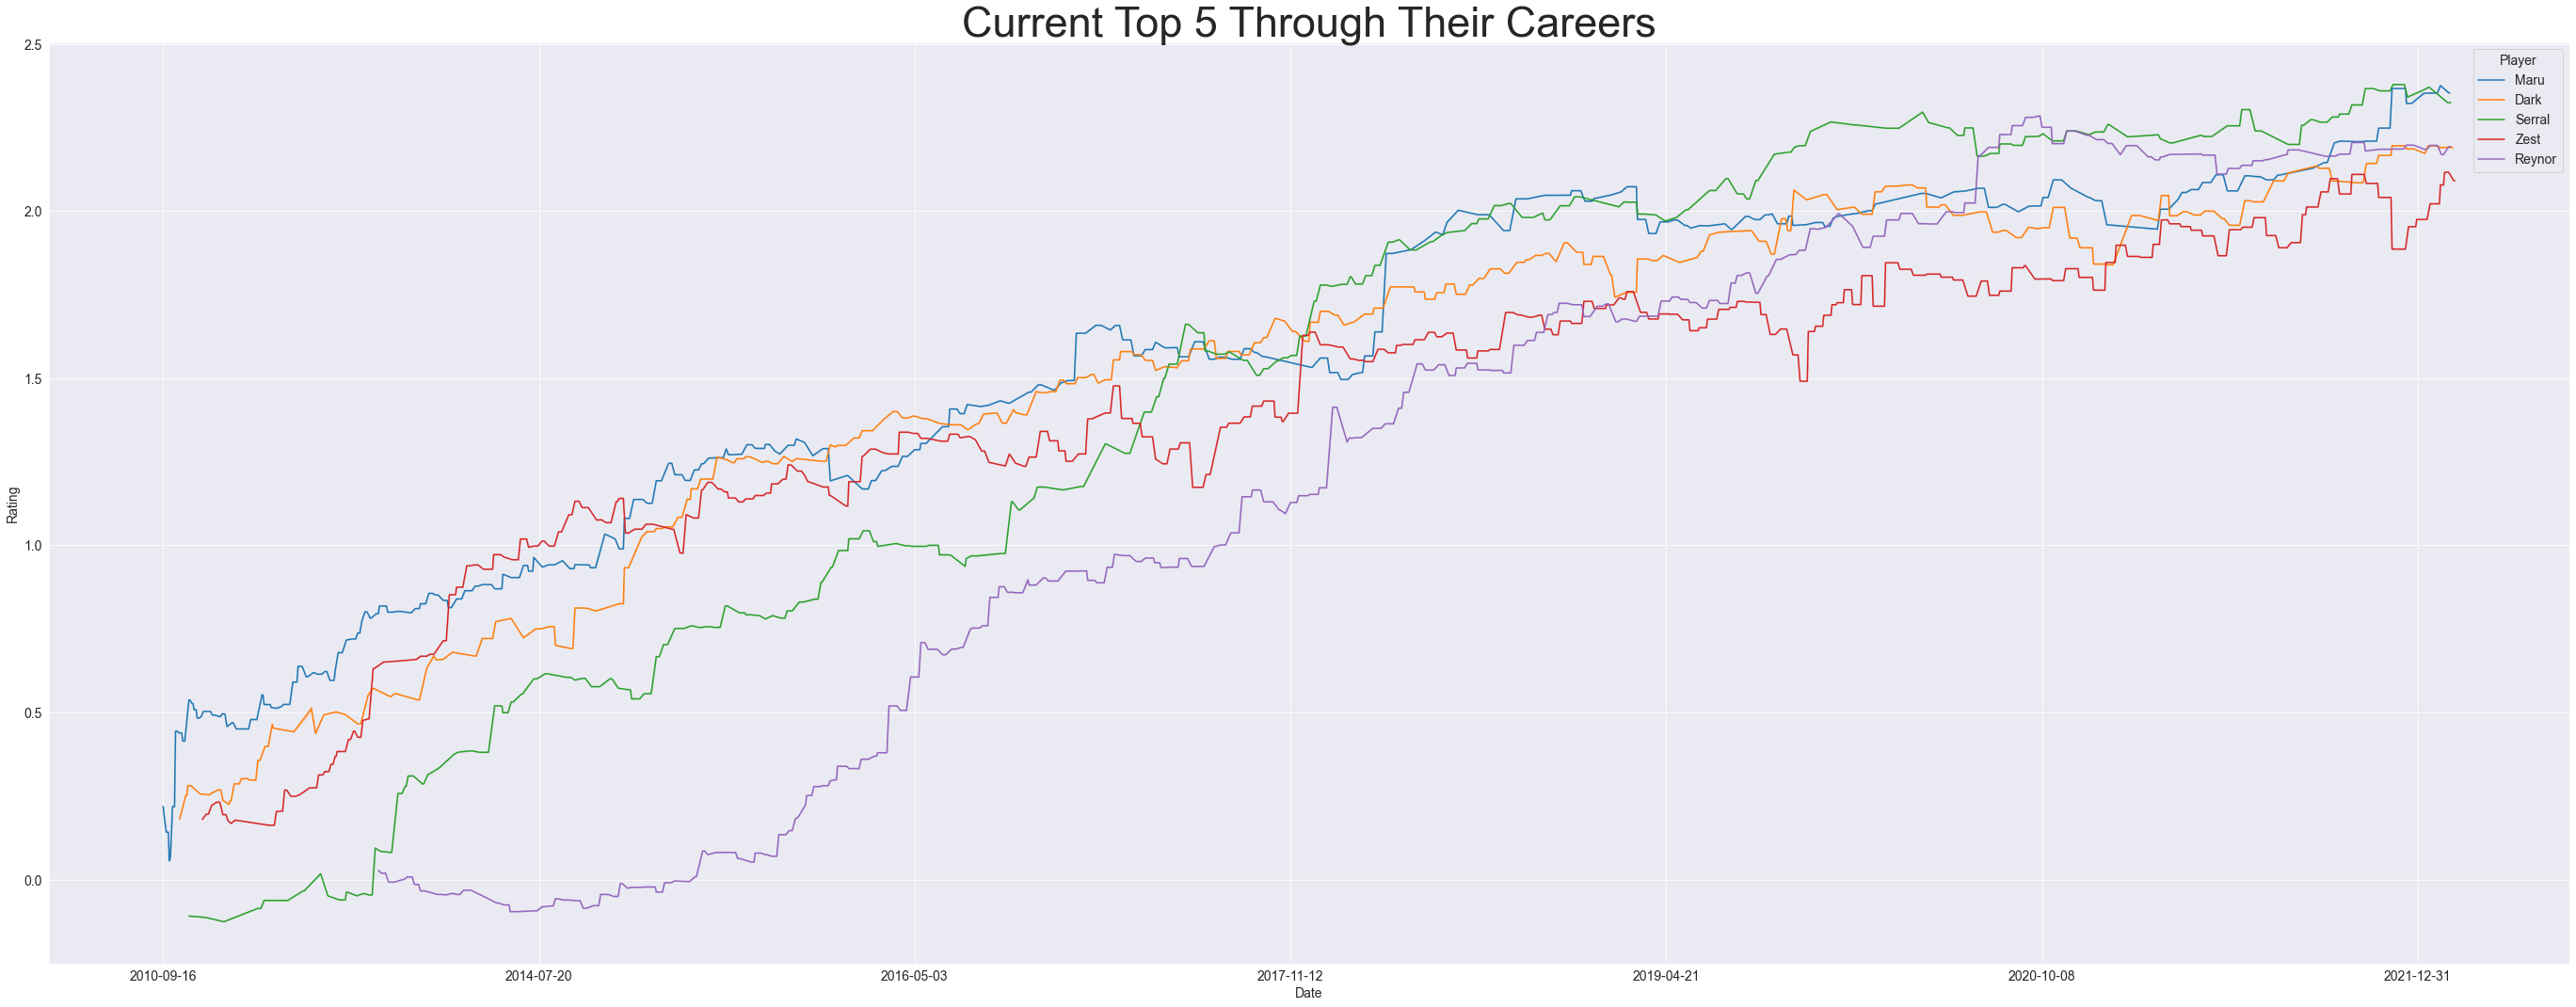

In [73]:
plt.figure(figsize=(48,18))
plt.xticks(np.arange(0, len(top_five_df_ot.date), 365))
ax = sns.lineplot(data=top_five_df_ot, x='date', y='rating', hue='tag')
ax.set(xlabel='Date', ylabel='Rating')
plt.title('Current Top 5 Through Their Careers', fontsize=45)
legend = ax.legend()
legend.set_title('Player');

In [74]:
# jovian.commit(project=project_name, filename=file_name)

### Q2: Who where to top players from each SC2 Expansion?

We have a good picture of the current tops of SC2 and how they have preformed over time, but SC2 changes with each new expanstion and patch. This raises a question: Who were the tops of each expansion?

Our `match_df` already contains a data point for the current expansion during every match, lets take advantage of that.

In [75]:
# groupby expansions

WoL_df, HotS_df, LotV_df = match_df[match_df.game == 'WoL'], match_df[match_df.game == 'HotS'], match_df[match_df.game == 'LotV']

#### **Top Players**: Wings of Liberty (WoL)

In [76]:
WoL_rating_df = WoL_df.groupby('tag')['rating'].max()
WoL_rating_df.sort_values(ascending=False, inplace=True)
WoL_rating_df.head(10)

tag
Zest          2.082802
SpeCial       1.659680
Spirit        1.624904
Gerald        1.514114
Krystianer    1.436549
Bly           1.348471
goblin        1.256723
trigger       1.170732
AqueroN       1.141078
ArT           1.093220
Name: rating, dtype: float64

In [77]:
WoL_top_five = [one, two, three, four, five] = (
    WoL_df[WoL_df.tag == 'Zest'], WoL_df[WoL_df.tag == 'SpeCial'], WoL_df[WoL_df.tag == 'Spirit'],
    WoL_df[WoL_df.tag == 'Gerald'], WoL_df[WoL_df.tag == 'Krystianer']
    )

WoL_top_five_df = pd.concat(WoL_top_five)

WoL_top_five_ot = WoL_top_five_df.sort_values(by='date', ascending=True)

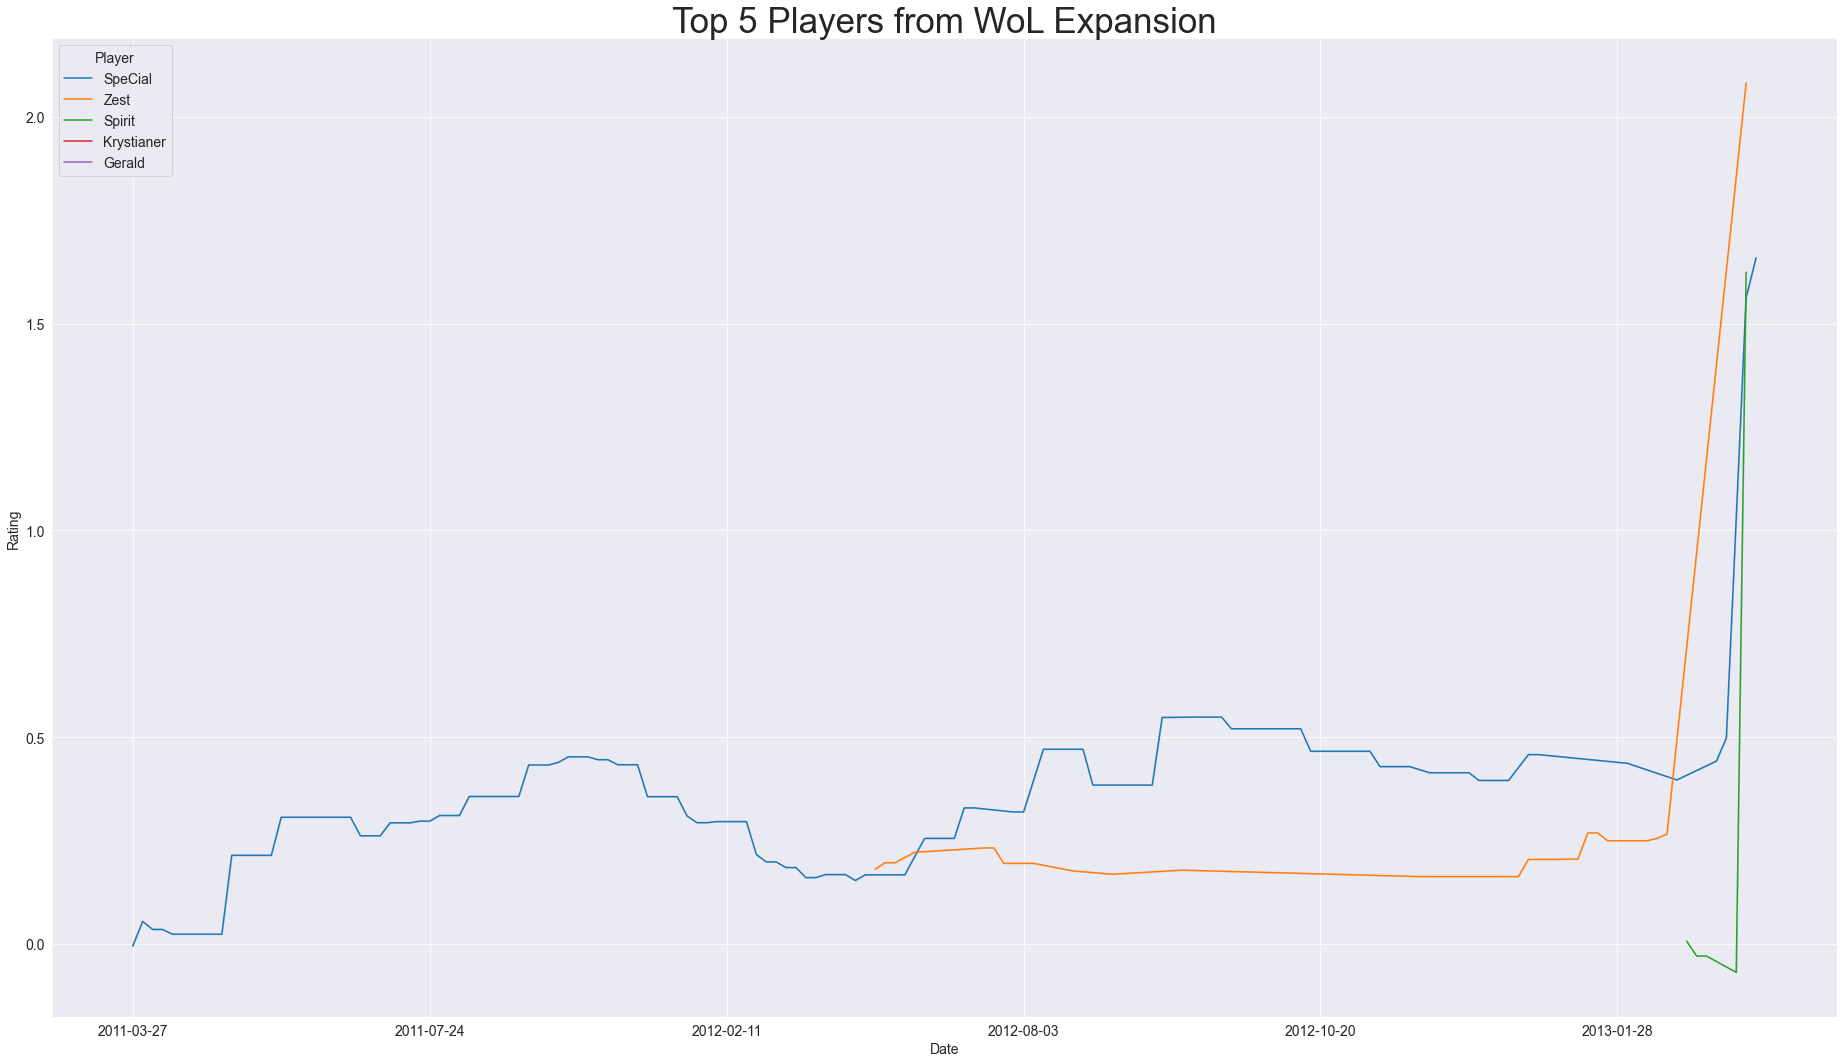

In [78]:
plt.figure(figsize=(32,18))
plt.xticks(np.arange(0, len(WoL_top_five_ot.date), 30))
ax = sns.lineplot(data=WoL_top_five_ot, x='date', y='rating', hue='tag')
ax.set(xlabel='Date', ylabel='Rating')
plt.title('Top 5 Players from WoL Expansion', fontsize=35)
legend = ax.legend()
legend.set_title('Player');

#### **Top Players**: Heart of the Swarm (HotS)

In [79]:
HoTS_rating_df = HotS_df.groupby('tag')['rating'].max()
HoTS_rating_df.sort_values(ascending=False, inplace=True)
HoTS_rating_df.head(10)

tag
INnoVation    1.552977
PartinG       1.374106
Rain          1.373878
ByuN          1.363653
soO           1.361196
Hydra         1.359852
sOs           1.354219
Life          1.353935
Solar         1.332859
Maru          1.318468
Name: rating, dtype: float64

In [80]:
Hots_top_five = [one, two, three, four, five] = (
    HotS_df[HotS_df.tag == 'INnoVation'], HotS_df[HotS_df.tag == 'PartinG'], HotS_df[HotS_df.tag == 'Rain'], HotS_df[HotS_df.tag == 'ByuN'], 
    HotS_df[HotS_df.tag == 'soO']
    )

Hots_top_five_df = pd.concat(Hots_top_five)

Hots_top_five_ot = Hots_top_five_df.sort_values(by='date', ascending=True)

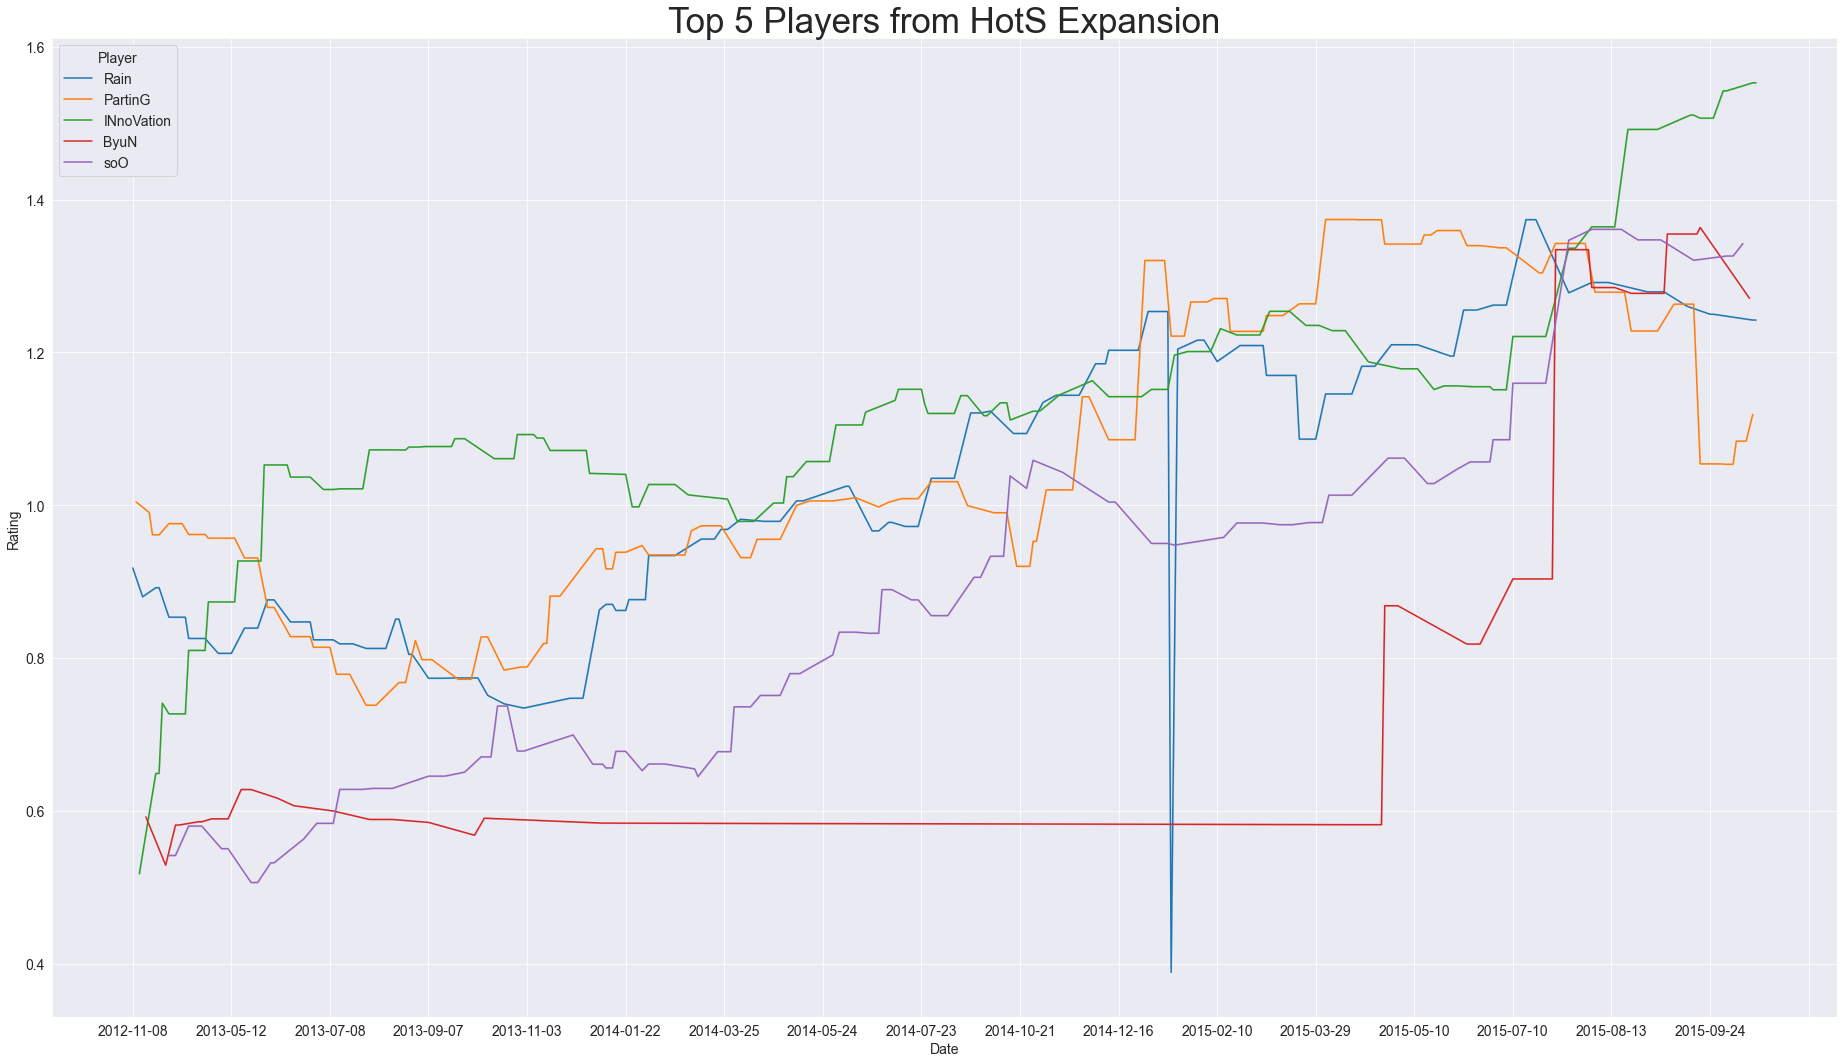

In [81]:
plt.figure(figsize=(32,18))
plt.xticks(np.arange(0, len(Hots_top_five_ot.date), 30))
ax = sns.lineplot(data=Hots_top_five_ot, x='date', y='rating', hue='tag')
ax.set(xlabel='Date', ylabel='Rating')
plt.title('Top 5 Players from HotS Expansion', fontsize=35)
legend = ax.legend()
legend.set_title('Player');

#### **Top Players**: Legecy of the Void (LotV)

In [82]:
LotV_rating_df = LotV_df.groupby('tag')['rating'].max()
LotV_rating_df.sort_values(ascending=False, inplace=True)
LotV_rating_df.head(10)

tag
Serral        2.378497
Maru          2.375512
Clem          2.294994
Reynor        2.284719
Rogue         2.197286
Dark          2.195223
Cure          2.170534
Zest          2.116280
HeRoMaRinE    2.080426
INnoVation    2.076294
Name: rating, dtype: float64

In [83]:
LotV_top_five = [one, two, three, four, five] = (
    LotV_df[LotV_df.tag == 'Serral'], LotV_df[LotV_df.tag == 'Maru'], LotV_df[LotV_df.tag == 'Clem'], LotV_df[LotV_df.tag == 'Reynor'], 
    LotV_df[LotV_df.tag == 'Rogue']
)

LotV_top_five_df = pd.concat(LotV_top_five)

LotV_top_five_ot = LotV_top_five_df.sort_values(by='date', ascending=True)

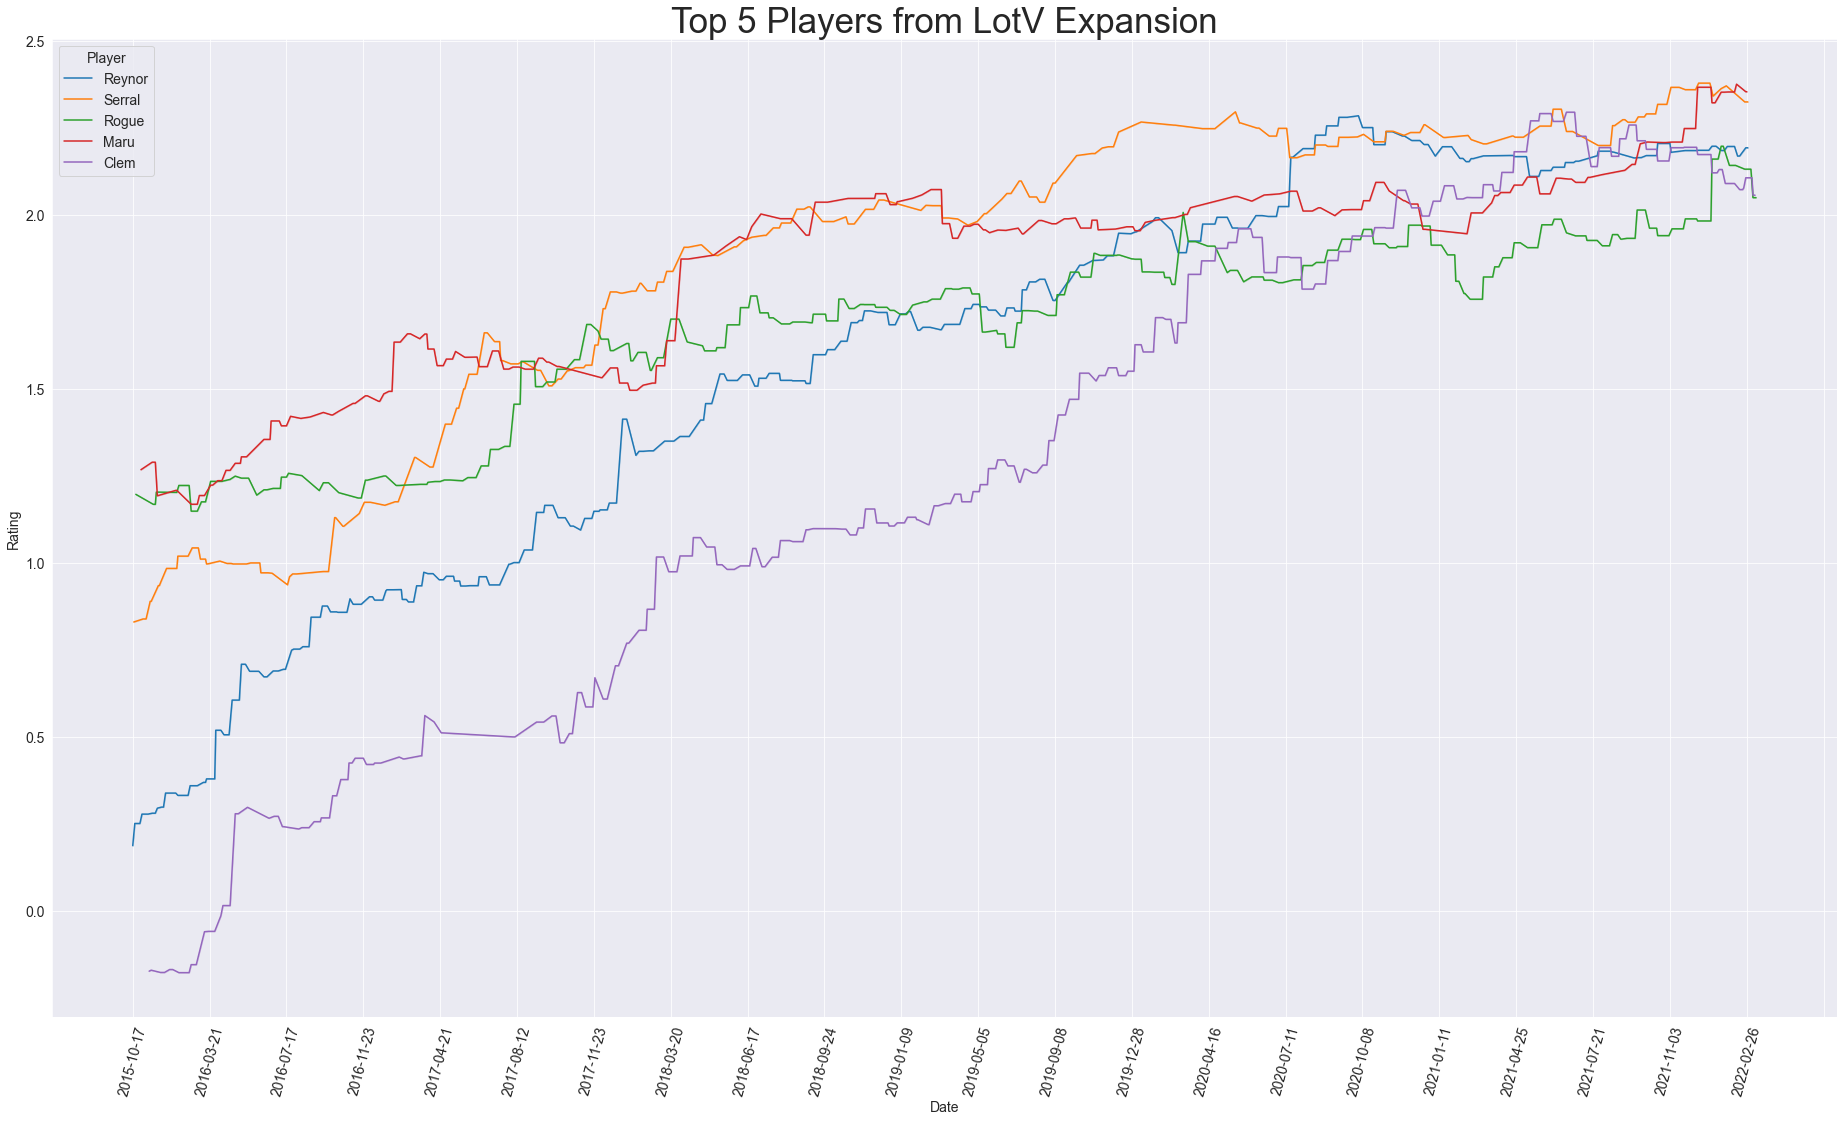

In [84]:
plt.figure(figsize=(32,18))
plt.xticks(np.arange(0, len(LotV_top_five_ot.date), 75), rotation=75)
ax = sns.lineplot(data=LotV_top_five_ot, x='date', y='rating', hue='tag')
ax.set(xlabel='Date', ylabel='Rating')
plt.title('Top 5 Players from LotV Expansion', fontsize=35)
legend = ax.legend()
legend.set_title('Player');

### Q3: Who are the youngest players currently competing?

Lets take a look at the youngest players player SC2 competivley right now. In order to compete in SC2, you must be at least 16 years of age. While you may still 'compete' before then, you may not receive price money or and league points.

We know every players birthday, so lets convert that into an age.

In [85]:
from datetime import datetime, date

today = date.today()

players_full_df.birthday = pd.to_datetime(players_full_df.birthday)

players_birthday = players_full_df.groupby('tag')['birthday'].max()
players_birthday = players_birthday.to_frame()
players_birthday['year'] = pd.DatetimeIndex(players_birthday['birthday']).year
players_birthday['age'] = today.year - players_birthday.year
players_birthday.sort_values(by='age', ascending=True)

,birthday,year,age
tag,,,
arrogfire,2007-05-24,2007.0,15.0
WannaBeByuN,2007-06-17,2007.0,15.0
Ghosti,2006-06-20,2006.0,16.0
SlyCrab,2005-05-17,2005.0,17.0
Exostriker,2005-03-22,2005.0,17.0
...,...,...,...
风间琉璃,NaT,NaN,NaN
香辣蟹,NaT,NaN,NaN
高冷小傲娇,NaT,NaN,NaN


In [86]:
under_18 = players_birthday.age[players_birthday.age < 18].to_frame()
under_18.reset_index(inplace=True)
under_18 = under_18.merge(players_full_df[['tag', 'name', 'country', 'race', 'rating']], on='tag').groupby('tag')[['age', 'name', 'country', 'race', 'rating']].max()
under_18.replace({'T': 'Terran', 'P': 'Protoss', 'Z': 'Zerg'}, inplace=True)
under_18

,age,name,country,race,rating
tag,,,,,
BabyMarine,17.0,Andrea Romiti,IT,Terran,0.708286
Exostriker,17.0,Никита Суровцев,RU,Protoss,0.520895
Ghosti,16.0,Raziel Lindbüchl,DE,Zerg,0.358809
SlyCrab,17.0,Олексій Захарчук,UA,Protoss,0.424236
WannaBeByuN,15.0,Кирилл Гимпель,BY,Terran,-0.131862
arrogfire,15.0,Sylvain Joffre,FR,Protoss,0.838377


What races are our new and upcoming players playing?

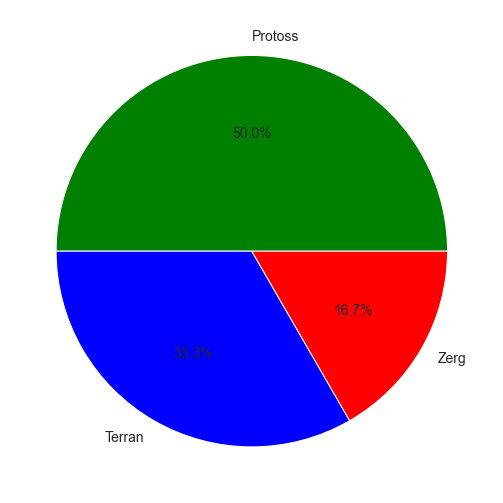

In [87]:
young_races = under_18.race.value_counts()

clrs = ['Green', 'Blue', 'Red']
plt.figure(figsize=(16,9))
plt.pie(young_races, autopct='%1.1f%%', labels=young_races.index, colors=clrs);

In [88]:
# jovian.commit(project=project_name, filename=file_name)

### Q4: Who is the best in each match up from 2021?

Due to the nature of SC2, players are not always strong against all the races. Infact they often have one race streangth. Lets take a look at how well each player preformns against each race.

For this analysis we will be looking at each players rating delta. Because of this a lower 'rating' is better.

In [89]:
match_df.date = pd.to_datetime(match_df.date)

In [90]:
players_match_2021_plus = match_df[match_df.date > '2020-12-31']
players_match_2021 = players_match_2021_plus[players_match_2021_plus.date < '2022-01-01']

#### Players VS Zerg

In [91]:
players21_vsz_delta = players_match_2021.groupby('tag')['rating_vz'].mean().sort_values(ascending=True).head(10)
players21_vsz_delta

tag
Patience     -0.271882
MariK        -0.231758
RoRro        -0.208848
Punk         -0.202461
TheoRy       -0.181608
LeFaucheur   -0.178037
CaVaLieR     -0.169544
Dark         -0.159302
Serral       -0.153450
SlyCrab      -0.147145
Name: rating_vz, dtype: float64

#### Players VS Protoss

In [92]:
players21_vsp_delta = players_match_2021.groupby('tag')['rating_vp'].mean().sort_values(ascending=True).head(10)
players21_vsp_delta

tag
Epic      -0.220658
Angry     -0.213764
Brat_OK   -0.209856
Awers     -0.201727
control   -0.193377
sOs       -0.192427
imData    -0.187341
PartinG   -0.186606
BsK       -0.182155
Chappy    -0.177764
Name: rating_vp, dtype: float64

#### Players VS Terran

In [93]:
players21_vst_delta = players_match_2021.groupby('tag')['rating_vt'].mean().sort_values(ascending=True).head(10)
players21_vst_delta

tag
Kelazhur     -0.225561
IdrALing     -0.219437
Spirit       -0.211592
TheMusZero   -0.202785
Reaper       -0.201189
Jig          -0.199739
kiyj         -0.195417
DeMusliM     -0.190896
Clem         -0.183060
Asuna        -0.175455
Name: rating_vt, dtype: float64

In [94]:
# jovian.commit(project=project_name, filename=file_name)

### Q5: What was Serral's rise to dominace like?

Serral is the current World Champion in SC2 after his recent victory in the 2022 Katowice Tournoment, lets take a look at his rise to the top.

In [95]:
serral_hist_full = match_df[match_df.tag == 'Serral']

#### How does Serral preform against each race?

Just like above when analyzing each players race preformance, we will be mesuring rating delta, lower is better.

In [96]:
serral_vszpt = serral_hist_full.loc[:, ('rating_vp', 'rating_vt', 'rating_vz', 'date')]
serral_vszpt.rename(columns={'rating_vp': 'vsProtoss', 'rating_vt': 'vsTerran', 'rating_vz': 'vsZerg'}, inplace=True)
serral_vszpt

,vsProtoss,vsTerran,vsZerg,date
31425283,0.067085,-0.065441,-0.001644,2016-07-23
31425284,0.067085,-0.065441,-0.001644,2016-07-23
31425285,0.067085,-0.065441,-0.001644,2016-07-23
31425286,0.067085,-0.065441,-0.001644,2016-07-23
31425287,0.067085,-0.065441,-0.001644,2016-07-23
...,...,...,...,...
31605618,-0.015260,-0.009279,0.024540,2014-05-17
31605619,-0.015260,-0.009279,0.024540,2014-05-17
31605620,-0.015260,-0.009279,0.024540,2014-05-17
31605621,-0.015260,-0.009279,0.024540,2014-05-17


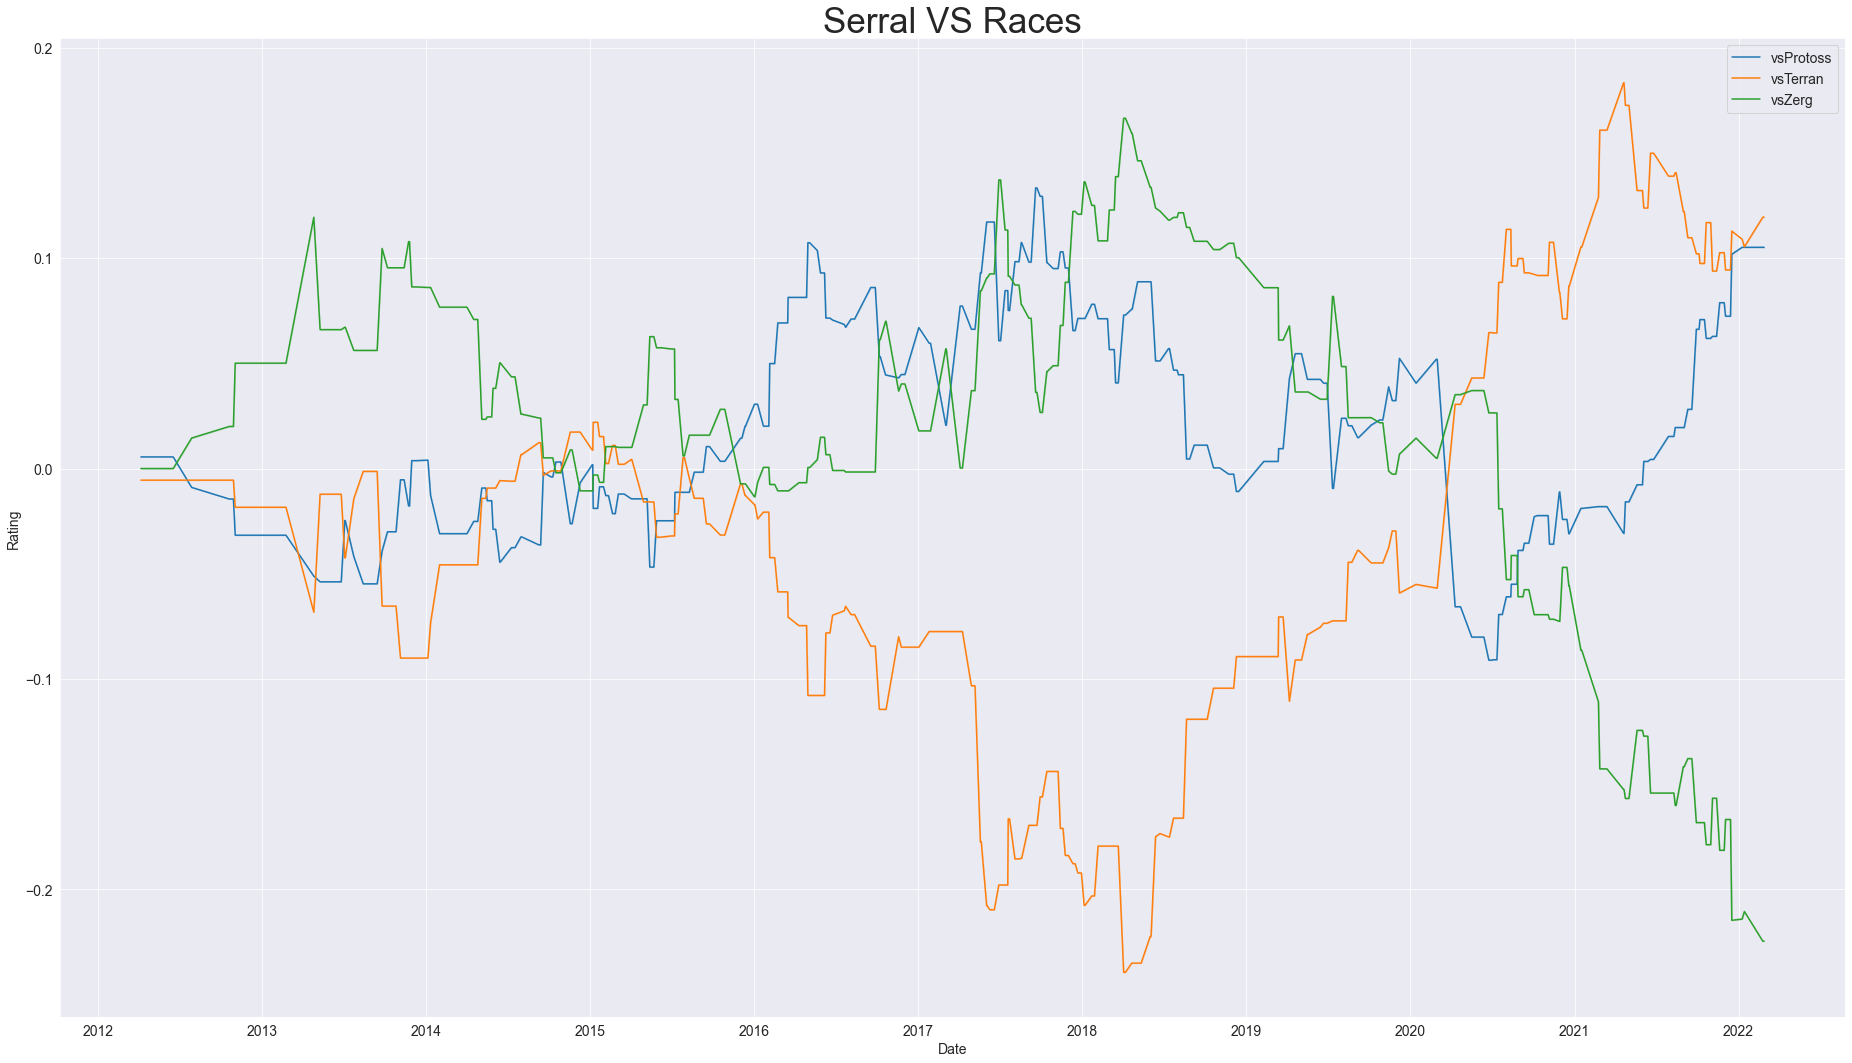

In [97]:
plt.figure(figsize=(32,18))
ax = sns.lineplot(x='date', y='value', hue='variable', data=pd.melt(serral_vszpt, ['date']))
ax.set(xlabel='Date', ylabel='Rating', title='Serral VS Races')
plt.title('Serral VS Races', fontsize=35)
legend = ax.legend()
legend.set_title('');

As we can see, Serral is never 'strong' against all the races. We can see in 2015 he was defently the most consistant, but not preforming outside avrage for any race.

#### How has Serral's rating changed over time?

In [98]:
serral_rat_exp = serral_hist_full[['date', 'rating', 'game']]
serral_rat_exp

,date,rating,game
31425283,2016-07-23,0.960689,LotV
31425284,2016-07-23,0.960689,LotV
31425285,2016-07-23,0.960689,LotV
31425286,2016-07-23,0.960689,LotV
31425287,2016-07-23,0.960689,LotV
...,...,...,...
31605618,2014-05-17,0.499724,HotS
31605619,2014-05-17,0.499724,HotS
31605620,2014-05-17,0.499724,HotS
31605621,2014-05-17,0.499724,HotS


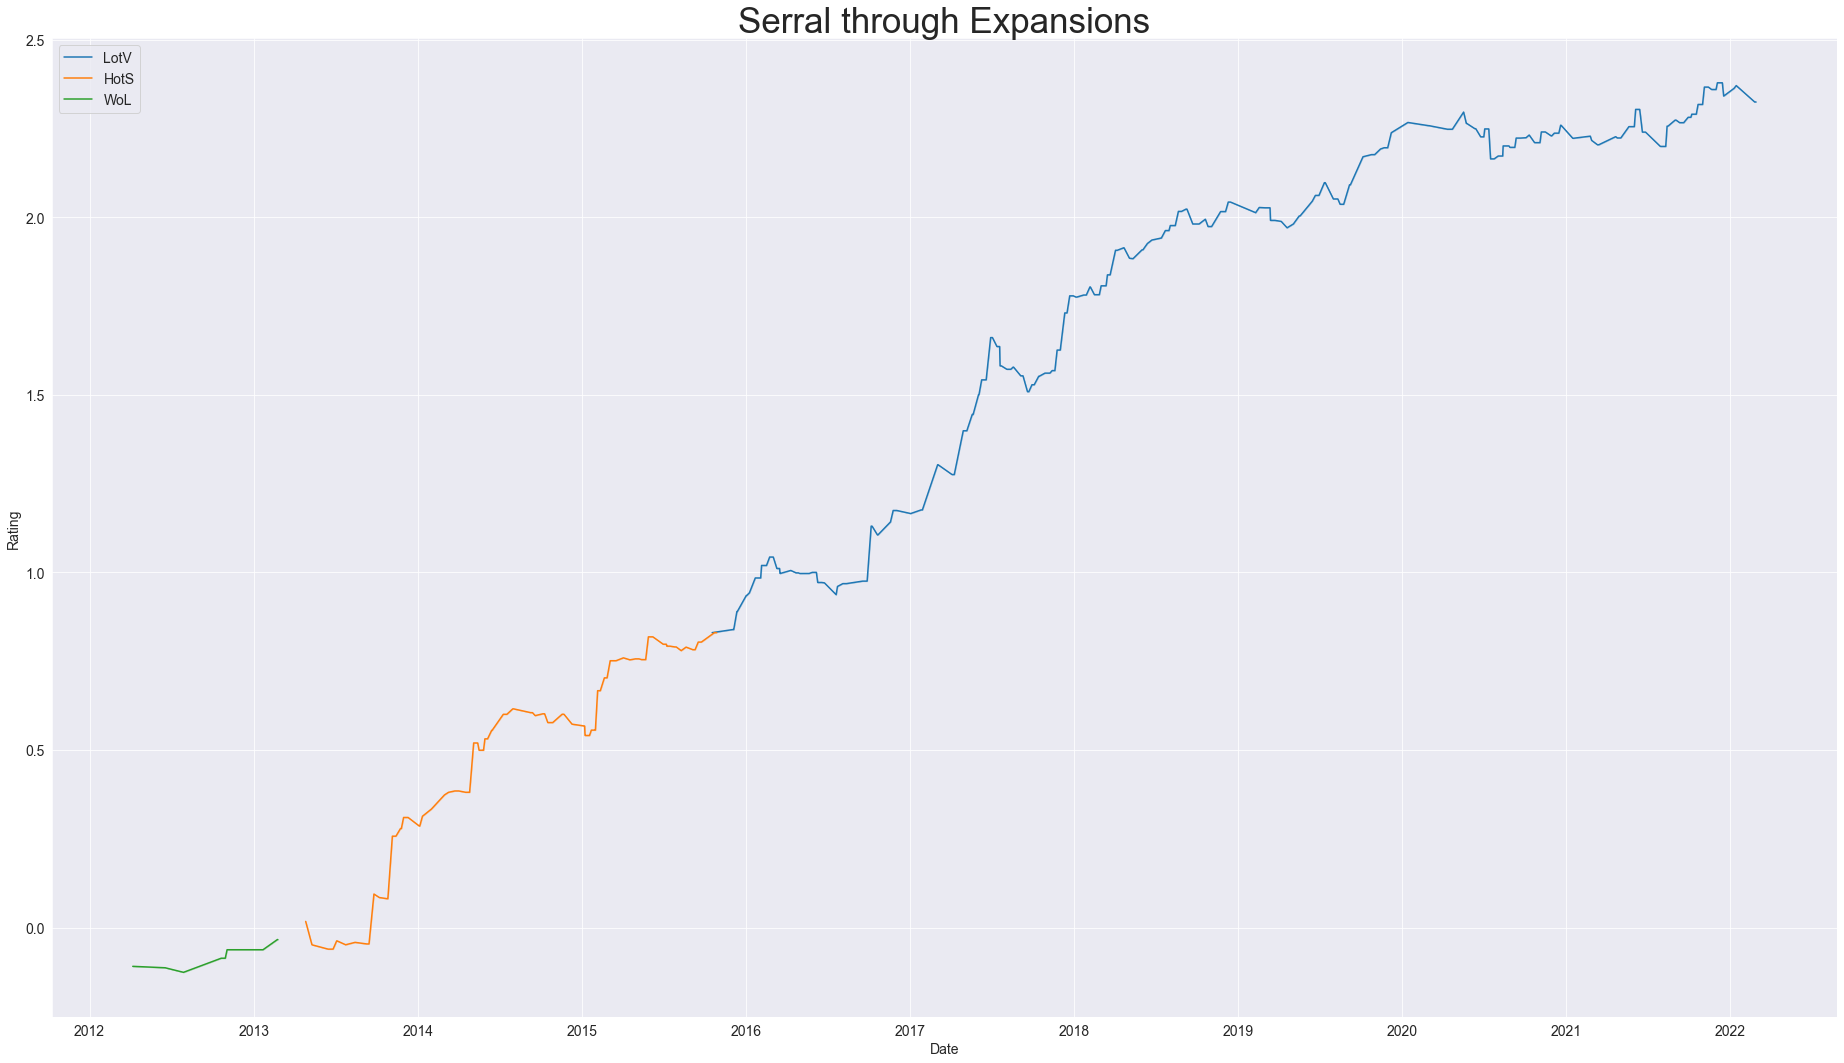

In [99]:
plt.figure(figsize=(32,18))
ax = sns.lineplot(data=serral_rat_exp, x='date', y='rating', hue='game')
ax.set(xlabel='Date', ylabel='Rating')
plt.title('Serral through Expansions', fontsize=35)
legend = ax.legend()
legend.set_title('');

In [100]:
# serrals avrage position from all his matches

serral_hist_full.groupby('tag')['position'].mean()

tag
Serral    65.764706
Name: position, dtype: float64

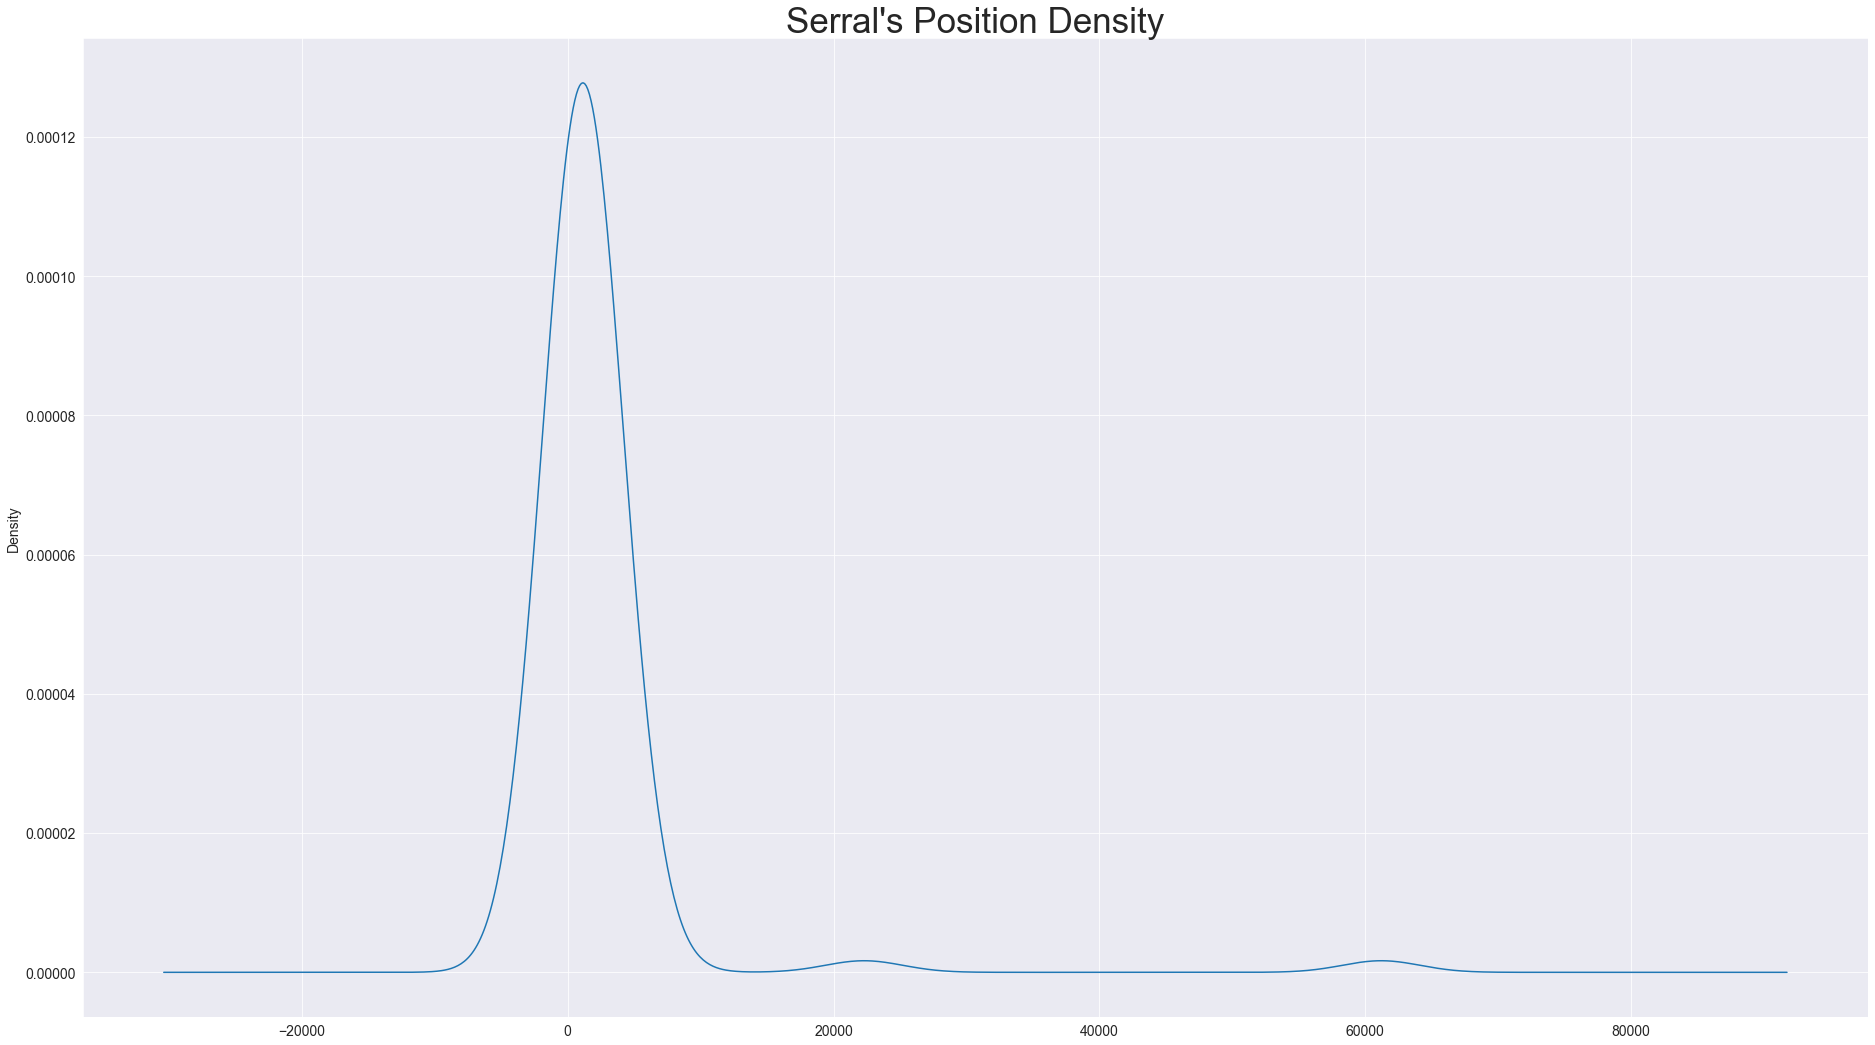

In [101]:
pos_density = serral_hist_full.groupby('position')['position'].count()

plt.figure(figsize=(32,18))
ax = pos_density.plot.kde()
plt.title("Serral's Position Density", fontsize=35);

## Inferences and Conclusion

We have drawn many inferances from our anlysis, just a few worth mentioning are:

- SC2 is not as diverse as one might expected, with a majorty of the players hailing from Korea.
- There is a suprisingly smooth curve when its comes to the players earnings, which is directly porpotionate with the players performance.
- Dominate players commenly don't remain dominate after a new expansion is relased. 
- Among all the players that have played SC2 over time, the race distribution among them has been almost exactly even. 
- Having the best avrage rating through the year doesn't correlate to becoming the world champion, as that becomes reliant on just a single tournment.


## References and Future Work

### Resources:
- Aligulac Dataset: http://aligulac.com/about/db/
- SC2 Wiki: https://en.wikipedia.org/wiki/StarCraft_II:_Wings_of_Liberty
- SQL For Beginners Tutorial: https://www.youtube.com/watch?v=5hzZtqCNQKk
- Various SC2 Analysis References: https://www.kaggle.com/search?q=Starcraft+in%3Anotebooks
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- Geopands Documention: https://geopandas.org/en/stable/index.html

### Future Work:
We really just scratched the surface with the data that we looked at in the analysis. You can head over to the Aligulac Dataset and take a look at all the data points that are recoreded and do an analysis of your own!

#### A few ideas:
- Analyze how often players make to to Katowice (world tournament).
- How to players perform once they make it to Katowice?
- Youngest player to make it to Katowice.
- How does preformance from the season corralate with preformance in Katowice?
- Does one race tend to do better aginst the others? or a certian race in spesific?
- How often do players change races (I wouldn't inclue switchers or randoms for this analysis)?
- AND SO MUCH MORE!

In [102]:
import jovian

In [103]:
jovian.commit(project=project_name, filename=file_name)

<IPython.core.display.Javascript object>